In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/landslide4sense/TrainData'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/landslide4sense/TrainData/mask/mask_65.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1334.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1816.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1898.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_3795.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_29.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2333.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1204.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_540.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1217.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2251.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1014.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_1312.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2421.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2740.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_2611.h5
/kaggle/input/landslide4sense/TrainData/mask/mask_3672.h5
/kaggle/input/lands

In [2]:
path_single = '/kaggle/input/landslide4sense/TrainData/img/image_1000.h5'
path_single_mask = '/kaggle/input/landslide4sense/TrainData/mask/mask_1000.h5'

ls: ['img']
Input data shape (128, 128, 14)
data ndvi shape  (128, 128) f_data shape:  (1, 128, 128, 3)


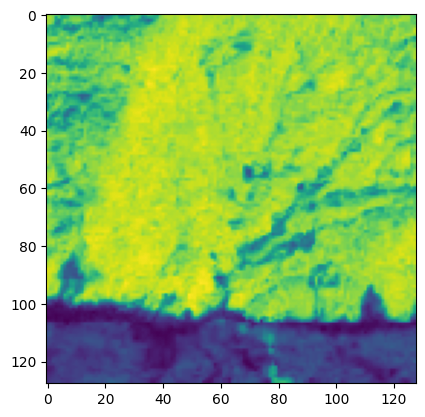

In [3]:
import h5py
import matplotlib.pyplot as plt
f_data = np.zeros((1,128,128, 3))
with h5py.File(path_single) as hdf:
    ls = list(hdf.keys())
    print(f'ls: {ls}')
    data = np.array(hdf.get('img'))
    print('Input data shape', data.shape)
    plt.imshow(data[:,:, 3:0:-1])

    data_red = data[:, :, 3]
    data_green = data[:, :, 2]
    data_blue = data[:, :, 1]
    data_nir = data[:, :, 7]
    data_rgb = data[:, :, 3:0:-1]
    data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
    f_data[0, :, :, 0] =data_ndvi
    f_data[0, :, :, 1] = data[:, :, 12]
    f_data[0, :, :, 2] = data[:, :, 13]

    print("data ndvi shape ", data_ndvi.shape, "f_data shape: ", f_data.shape)
    plt.imshow(data_ndvi)
    

ls: ['mask']
Data shape  (128, 128)


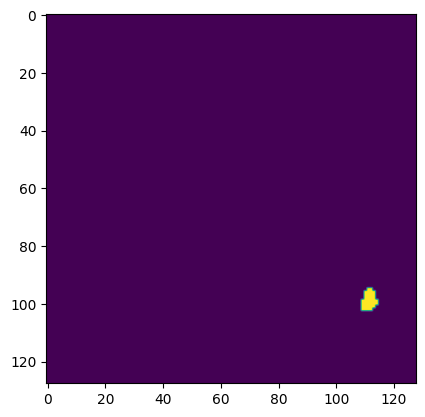

In [4]:
with h5py.File(path_single_mask) as hdf:
    ls = list(hdf.keys())
    print(f'ls: {ls}')
    data = np.array(hdf.get('mask'))
    print('Data shape ', data.shape)
    plt.imshow(data)

In [5]:
Train_path = r'/kaggle/input/landslide4sense/TrainData/img/*.h5'
Train_mask = r'/kaggle/input/landslide4sense/TrainData/mask/*h5'

In [6]:
Train_path

'/kaggle/input/landslide4sense/TrainData/img/*.h5'

In [7]:
import glob
TRAIN_XX = np.zeros((3799, 128,128,6))
TRAIN_YY = np.zeros((3799,128,128,1))
all_train = sorted(glob.glob(Train_path))
all_mask = sorted(glob.glob(Train_mask))

In [8]:
for i, (img,mask) in enumerate(zip(all_train, all_mask)):
    print(i,img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))


        data[np.isnan(data)] = 0.000001

        mid_rgb = data[:,:,1:4].max()/ 2.0
        mid_slope = data[:,:,12].max() /2.0
        mid_elevation = data[:,:,13].max()/2.0


        data_red = data[:,:, 3]
        data_nir = data[:,:,7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))

        TRAIN_XX[i,:,:,0] = 1 - data[:,:,3]/mid_rgb
        TRAIN_XX[i,:,:,1] = 1 - data[:,:,2]/mid_rgb
        TRAIN_XX[i,:,:,2] = 1 - data[:,:,1]/mid_rgb
        
        TRAIN_XX[i,:,:,3] = data_ndvi
        TRAIN_XX[i,:,:,4] = 1-data[:,:,12]/mid_slope
        TRAIN_XX[i,:,:, 5] = 1 - data[:,:,13]/mid_elevation

    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('mask'))
        TRAIN_YY[i,:,:, 0] = data

0 /kaggle/input/landslide4sense/TrainData/img/image_1.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1.h5
1 /kaggle/input/landslide4sense/TrainData/img/image_10.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_10.h5
2 /kaggle/input/landslide4sense/TrainData/img/image_100.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_100.h5
3 /kaggle/input/landslide4sense/TrainData/img/image_1000.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1000.h5
4 /kaggle/input/landslide4sense/TrainData/img/image_1001.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1001.h5
5 /kaggle/input/landslide4sense/TrainData/img/image_1002.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1002.h5
6 /kaggle/input/landslide4sense/TrainData/img/image_1003.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1003.h5
7 /kaggle/input/landslide4sense/TrainData/img/image_1004.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_1004.h5
8 /kaggle/input/landslide4sense/TrainData/img/image_1005.h5 /kaggle/

<ipython-input-8-482aa12eebe9>:24: RuntimeWarning: invalid value encountered in divide
  TRAIN_XX[i,:,:,4] = 1-data[:,:,12]/mid_slope


1677 /kaggle/input/landslide4sense/TrainData/img/image_2508.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2508.h5
1678 /kaggle/input/landslide4sense/TrainData/img/image_2509.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2509.h5
1679 /kaggle/input/landslide4sense/TrainData/img/image_251.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_251.h5
1680 /kaggle/input/landslide4sense/TrainData/img/image_2510.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2510.h5
1681 /kaggle/input/landslide4sense/TrainData/img/image_2511.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2511.h5
1682 /kaggle/input/landslide4sense/TrainData/img/image_2512.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2512.h5
1683 /kaggle/input/landslide4sense/TrainData/img/image_2513.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2513.h5
1684 /kaggle/input/landslide4sense/TrainData/img/image_2514.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_2514.h5
1685 /kaggle/input/landslide4sense

<ipython-input-8-482aa12eebe9>:17: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2271 /kaggle/input/landslide4sense/TrainData/img/image_3042.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3042.h5
2272 /kaggle/input/landslide4sense/TrainData/img/image_3043.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3043.h5
2273 /kaggle/input/landslide4sense/TrainData/img/image_3044.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3044.h5
2274 /kaggle/input/landslide4sense/TrainData/img/image_3045.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3045.h5
2275 /kaggle/input/landslide4sense/TrainData/img/image_3046.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3046.h5
2276 /kaggle/input/landslide4sense/TrainData/img/image_3047.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3047.h5
2277 /kaggle/input/landslide4sense/TrainData/img/image_3048.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3048.h5
2278 /kaggle/input/landslide4sense/TrainData/img/image_3049.h5 /kaggle/input/landslide4sense/TrainData/mask/mask_3049.h5
2279 /kaggle/input/landslide4sen

In [9]:
TRAIN_XX[np.isnan(TRAIN_XX)] = 0.000001
print(TRAIN_XX.min(), TRAIN_YY.min(), TRAIN_XX.max(), TRAIN_YY.max())

-1.0 0.0 1.0 1.0


In [10]:
import tensorflow as tf
def dice_loss(y_pred,y_true):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.math.sigmoid(y_pred)
    numerator = 2 * tf.reduce_sum(y_pred * y_true)
    denominator = tf.reduce_sum(y_pred + y_true)

    return 1 - numerator/denominator

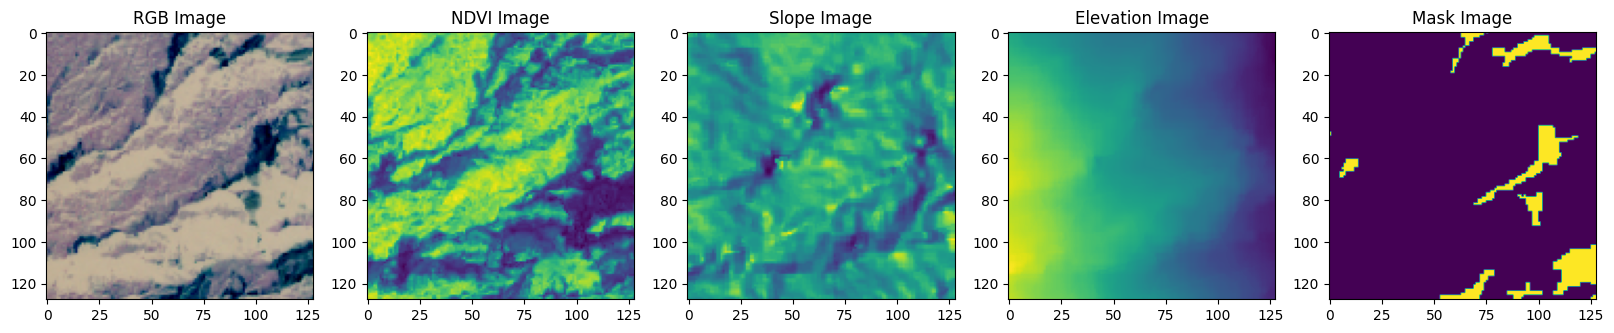

In [11]:
img = 234
fig,(ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,15))

ax1.set_title('RGB Image')
ax2.set_title('NDVI Image')
ax3.set_title('Slope Image')
ax4.set_title('Elevation Image')
ax5.set_title('Mask Image')
ax1.imshow(TRAIN_XX[img,:,:,0:3])
ax2.imshow(TRAIN_XX[img, :, :, 3])
ax3.imshow(TRAIN_XX[img, :, :, 4])
ax4.imshow(TRAIN_XX[img, :, :, 5])
ax5.imshow(TRAIN_YY[img, :, :, 0])

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(TRAIN_XX, TRAIN_YY, test_size = 0.2, shuffle = True)

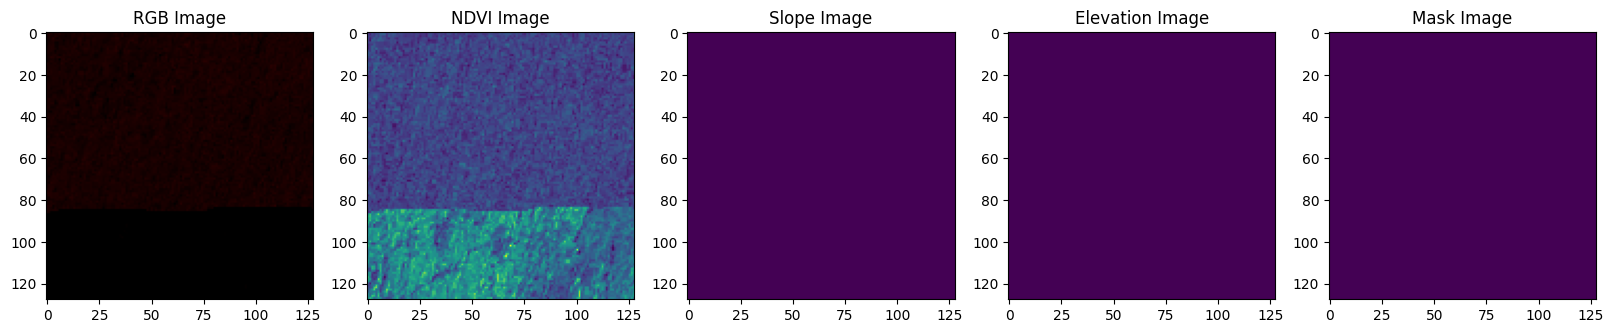

In [13]:
img = 1005
fig,(ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,15))

ax1.set_title('RGB Image')
ax2.set_title('NDVI Image')
ax3.set_title('Slope Image')
ax4.set_title('Elevation Image')
ax5.set_title('Mask Image')
ax1.imshow(x_train[img,:,:,0:3])
ax2.imshow(x_train[img, :, :, 3])
ax3.imshow(x_train[img, :, :, 4])
ax4.imshow(x_train[img, :, :, 5])
ax5.imshow(y_train[img, :, :, 0])

In [14]:
x_train.shape, y_train.shape

((3039, 128, 128, 6), (3039, 128, 128, 1))

In [15]:
del TRAIN_XX
del TRAIN_YY
del all_train
del all_mask

In [27]:
def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    # Converted inputs to floating
    #s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)


    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', #or categorical_crossentropy
              metrics=['accuracy',
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])
    
    return model

In [30]:
model = unet_model(128, 128, 6)

checkpointer = tf.keras.callbacks.ModelCheckpoint("best_model.keras", monitor="accuracy", verbose=1, save_best_only=True, mode="max")

# earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_m', patience=10, verbose=1, mode='max')
callbacks = [
    # earlyStopping,
    checkpointer
    ]
model_history = model.fit(x_train, y_train, batch_size = 16, verbose = 1, epochs = 100, validation_data= (x_test, y_test), shuffle = False, callbacks = callbacks)

model.save("model_save.h5")

Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9635 - loss: 0.1177 - precision_12: 0.1297 - recall_12: 0.0367
Epoch 1: accuracy improved from -inf to 0.97627, saving model to best_model.keras
190/190 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.9635 - loss: 0.1174 - precision_12: 0.1313 - recall_12: 0.0372 - val_accuracy: 0.9825 - val_loss: 0.0485 - val_precision_12: 0.7037 - val_recall_12: 0.4863
Epoch 2/100
188/190 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9830 - loss: 0.0453 - precision_12: 0.6607 - recall_12: 0.4973
Epoch 2: accuracy improved from 0.97627 to 0.98362, saving model to best_model.keras
190/190 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.9830 - loss: 0.0452 - precision_12: 0.6611 - recall_12: 0.4977 - val_accuracy: 0.9841 - val_loss: 0.0424 - val_precision_12: 0.7016 - val_recall_12: 0.6045
Epoch 3/100
189/190 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9851 - loss: 0.0390 - precision_12: 0.7194 - recall_12: 0.5543
Epoch 3: accura

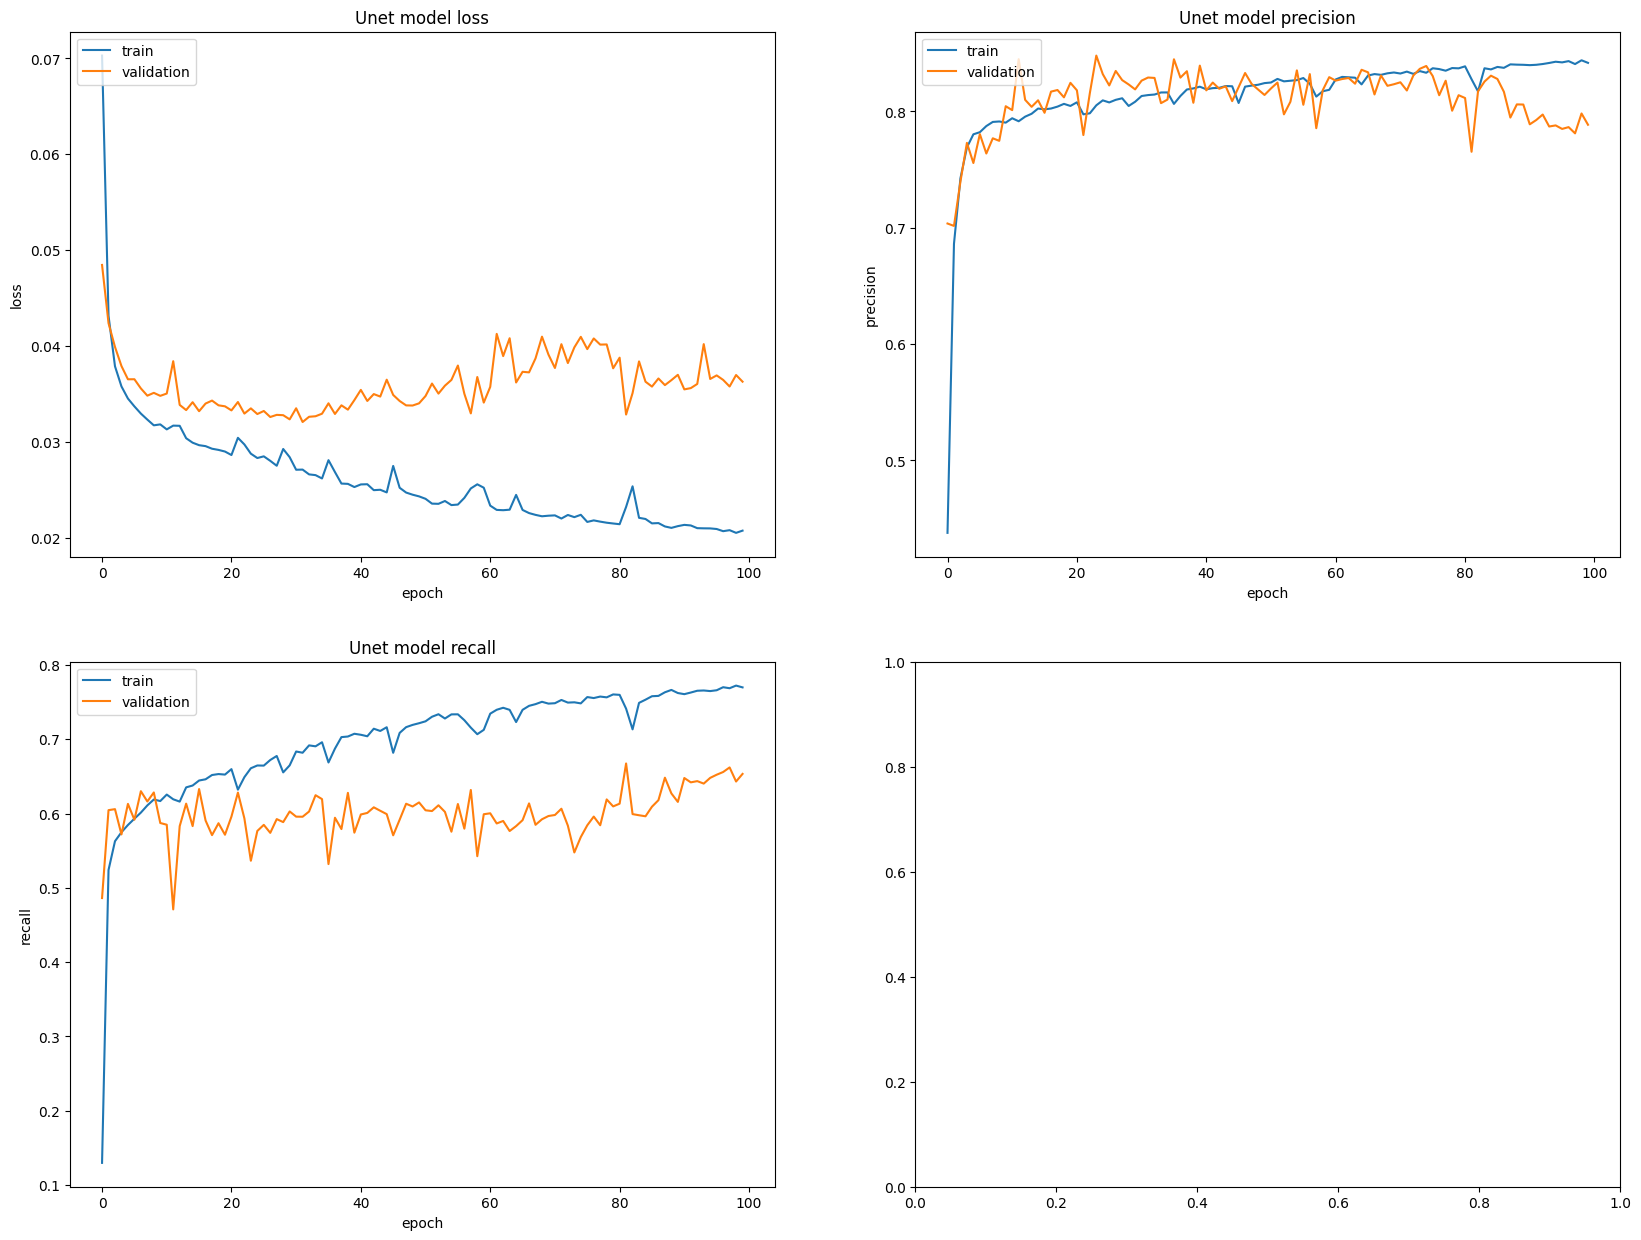

In [34]:
fig,((ax11,ax12),(ax13,ax14)) = plt.subplots(2,2,figsize=(20,15))
ax11.plot(model_history.history['loss'])
ax11.plot(model_history.history['val_loss'])
ax11.title.set_text('Unet model loss')
ax11.set_ylabel('loss')
ax11.set_xlabel('epoch')
ax11.legend(['train', 'validation'], loc='upper left')

ax12.plot(model_history.history['precision_12'])
ax12.plot(model_history.history['val_precision_12'])
ax12.set_title('Unet model precision')
ax12.set_ylabel('precision')
ax12.set_xlabel('epoch')
ax12.legend(['train', 'validation'], loc='upper left')

ax13.plot(model_history.history['recall_12'])
ax13.plot(model_history.history['val_recall_12'])
ax13.set_title('Unet model recall')
ax13.set_ylabel('recall')
ax13.set_xlabel('epoch')
ax13.legend(['train', 'validation'], loc='upper left')

In [36]:
threshold = 0.5
pred_img = model.predict(x_test)
pred_img = (pred_img > threshold).astype(np.uint8)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step


Text(0.5, 1.0, 'Training Image')

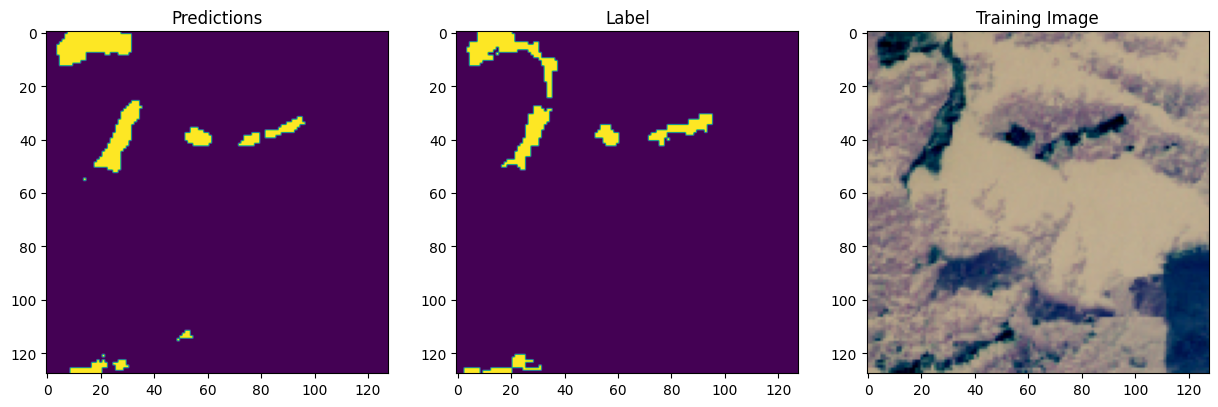

In [41]:
img = 206
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(y_test[img, :, :, 0])
ax2.set_title("Label")
ax3.imshow(x_test[img, :, :, 0:3])
ax3.set_title('Training Image')

In [43]:
validation_url = '/kaggle/input/landslide4sense/ValidData/img/*.h5'
val_img = sorted(glob.glob(validation_url))

VAL_XX = np.zeros((245, 128,128,6))
mask_name = []
for i, img in enumerate(val_img):
    print(i,img)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        print(f'ls: {ls}')
        data = np.array(hdf.get('img'))

        data[np.isnan(data)] = 0.0000001

        # to normalize the data 
        mid_rgb = data[:, :, 1:4].max() / 2.0
        mid_slope = data[:, :, 12].max() / 2.0
        mid_elevation = data[:, :, 13].max() / 2.0

        # ndvi calculation
        data_red = data[:, :, 3]
        data_nir = data[:, :, 7]
        data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))
        
        # final array
        VAL_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        VAL_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        VAL_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        VAL_XX[i, :, :, 3] = data_ndvi #NDVI
        VAL_XX[i, :, :, 4] = 1- data[:, :, 13] / mid_slope #SLOPE
        VAL_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation #ELEVATION
    

0 /kaggle/input/landslide4sense/ValidData/img/image_1.h5
ls: ['img']
1 /kaggle/input/landslide4sense/ValidData/img/image_10.h5
ls: ['img']
2 /kaggle/input/landslide4sense/ValidData/img/image_100.h5
ls: ['img']
3 /kaggle/input/landslide4sense/ValidData/img/image_101.h5
ls: ['img']
4 /kaggle/input/landslide4sense/ValidData/img/image_102.h5
ls: ['img']
5 /kaggle/input/landslide4sense/ValidData/img/image_103.h5
ls: ['img']
6 /kaggle/input/landslide4sense/ValidData/img/image_104.h5
ls: ['img']
7 /kaggle/input/landslide4sense/ValidData/img/image_105.h5
ls: ['img']
8 /kaggle/input/landslide4sense/ValidData/img/image_106.h5
ls: ['img']
9 /kaggle/input/landslide4sense/ValidData/img/image_107.h5
ls: ['img']
10 /kaggle/input/landslide4sense/ValidData/img/image_108.h5
ls: ['img']
11 /kaggle/input/landslide4sense/ValidData/img/image_109.h5
ls: ['img']
12 /kaggle/input/landslide4sense/ValidData/img/image_11.h5
ls: ['img']
13 /kaggle/input/landslide4sense/ValidData/img/image_110.h5
ls: ['img']
14 /ka

<ipython-input-43-f8489f914348>:23: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


ls: ['img']
166 /kaggle/input/landslide4sense/ValidData/img/image_28.h5
ls: ['img']
167 /kaggle/input/landslide4sense/ValidData/img/image_29.h5
ls: ['img']
168 /kaggle/input/landslide4sense/ValidData/img/image_3.h5
ls: ['img']
169 /kaggle/input/landslide4sense/ValidData/img/image_30.h5
ls: ['img']
170 /kaggle/input/landslide4sense/ValidData/img/image_31.h5
ls: ['img']
171 /kaggle/input/landslide4sense/ValidData/img/image_32.h5
ls: ['img']
172 /kaggle/input/landslide4sense/ValidData/img/image_33.h5
ls: ['img']
173 /kaggle/input/landslide4sense/ValidData/img/image_34.h5
ls: ['img']
174 /kaggle/input/landslide4sense/ValidData/img/image_35.h5
ls: ['img']
175 /kaggle/input/landslide4sense/ValidData/img/image_36.h5
ls: ['img']
176 /kaggle/input/landslide4sense/ValidData/img/image_37.h5
ls: ['img']
177 /kaggle/input/landslide4sense/ValidData/img/image_38.h5
ls: ['img']
178 /kaggle/input/landslide4sense/ValidData/img/image_39.h5
ls: ['img']
179 /kaggle/input/landslide4sense/ValidData/img/image

In [44]:
threshold = 0.5
pred_img = model.predict(VAL_XX)
pred_img = (pred_img > threshold).astype(np.uint8)
pred_img.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step


(245, 128, 128, 1)

Text(0.5, 1.0, 'Training Image')

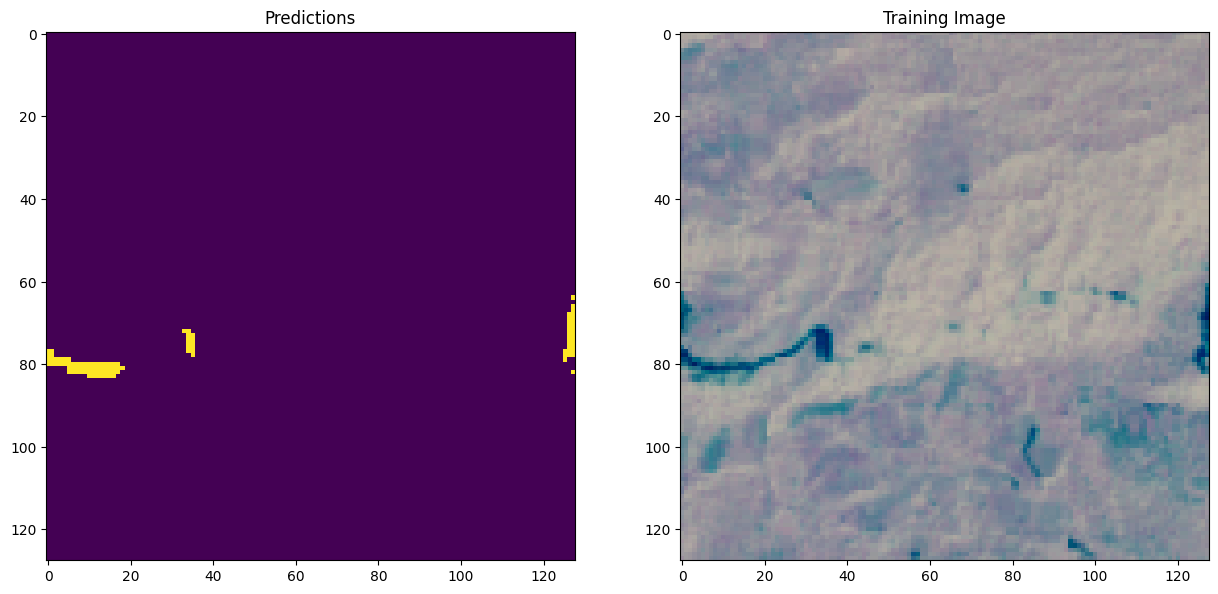

In [50]:
import random
img = random.randint(0, len(VAL_XX))
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15,10))
ax1.imshow(pred_img[img, :, :, 0])
ax1.set_title("Predictions")
ax2.imshow(VAL_XX[img, :, :, 0:3])
ax2.set_title('Training Image')